In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the dataset (make sure to provide the correct file path)
df = pd.read_csv('C:/Users/Rupesh Shinde/Desktop/HVAC/Energy_consumption.csv')

# Preview the data
df.head()

,time_of_day,temperature,humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,energy_usage
0,1/1/2022 0:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,1/1/2022 1:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,1/1/2022 2:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,1/1/2022 3:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,1/1/2022 4:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [3]:
# Step 3: Convert 'time_of_day' to datetime and extract hour
df['time_of_day'] = pd.to_datetime(df['time_of_day'])
df['hour'] = df['time_of_day'].dt.hour

# Preview to see the changes
df[['time_of_day', 'hour']].head()

,time_of_day,hour
0,2022-01-01 00:00:00,0
1,2022-01-01 01:00:00,1
2,2022-01-01 02:00:00,2
3,2022-01-01 03:00:00,3
4,2022-01-01 04:00:00,4


In [4]:
# Step 4: Encode categorical fields using LabelEncoder
le = LabelEncoder()
df['HVACUsage'] = le.fit_transform(df['HVACUsage'])  # 'On' -> 1, 'Off' -> 0
df['LightingUsage'] = le.fit_transform(df['LightingUsage'])  # 'On' -> 1, 'Off' -> 0
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])  # 'Monday' -> 0, 'Sunday' -> 6
df['Holiday'] = le.fit_transform(df['Holiday'])  # 'Yes' -> 1, 'No' -> 0

# Check the data to ensure encoding worked
df[['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']].head()


,HVACUsage,LightingUsage,DayOfWeek,Holiday
0,1,0,1,0
1,1,1,2,0
2,0,0,3,0
3,0,1,6,0
4,1,0,0,0


In [5]:
# Step 5: Define features and target
X = df[['temperature', 'humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 
        'RenewableEnergy', 'DayOfWeek', 'Holiday', 'hour']]
y = df['energy_usage']

# Show the first few rows of X and y
X.head(), y.head()


(   temperature   humidity  SquareFootage  Occupancy  HVACUsage  LightingUsage  \
 0    25.139433  43.431581    1565.693999          5          1              0   
 1    27.731651  54.225919    1411.064918          1          1              1   
 2    28.704277  58.907658    1755.715009          2          0              0   
 3    20.080469  50.371637    1452.316318          1          0              1   
 4    23.097359  51.401421    1094.130359          9          1              0   
 
    RenewableEnergy  DayOfWeek  Holiday  hour  
 0         2.774699          1        0     0  
 1        21.831384          2        0     1  
 2         6.764672          3        0     2  
 3         8.623447          6        0     3  
 4         3.071969          0        0     4  ,
 0    75.364373
 1    83.401855
 2    78.270888
 3    56.519850
 4    70.811732
 Name: energy_usage, dtype: float64)

In [6]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 10), (200, 10), (800,), (200,))

In [7]:
# Step 7: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [ 2.00080531e+00 -3.60393338e-02 -4.13522528e-04  4.99162907e-01
  4.49419039e+00  1.65329255e+00  9.63254945e-02 -2.00198046e-02
  5.26916333e-01 -3.08311090e-02]
Model intercept: 22.708770765743914


In [8]:
# Step 8: Predict on the test data
y_pred = model.predict(X_test)

# Display first few actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()


,Actual,Predicted
521,86.920611,83.322856
737,88.351606,81.550354
740,79.431363,75.946292
660,90.009188,88.394251
411,83.891100,75.570099


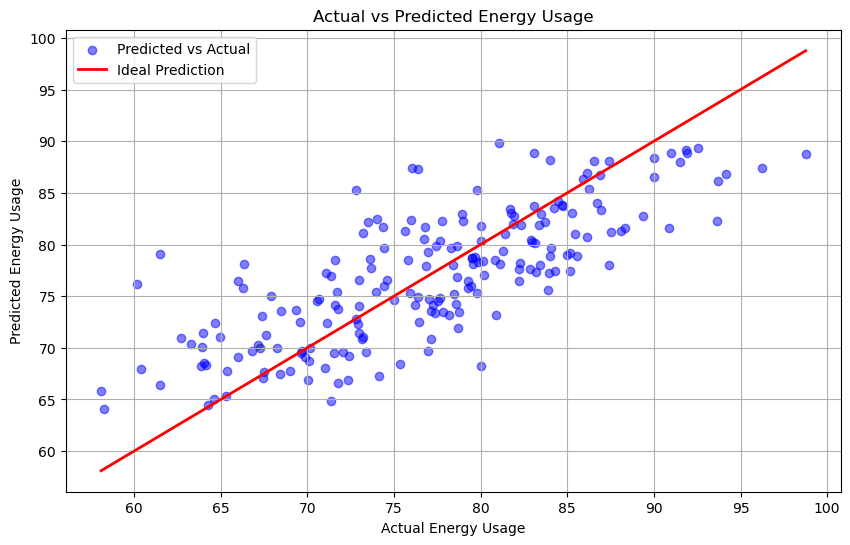

In [9]:
# Scatter plot: Actual vs Predicted Energy Usage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Energy Usage')
plt.ylabel('Predicted Energy Usage')
plt.title('Actual vs Predicted Energy Usage')
plt.legend()
plt.grid(True)
plt.show()


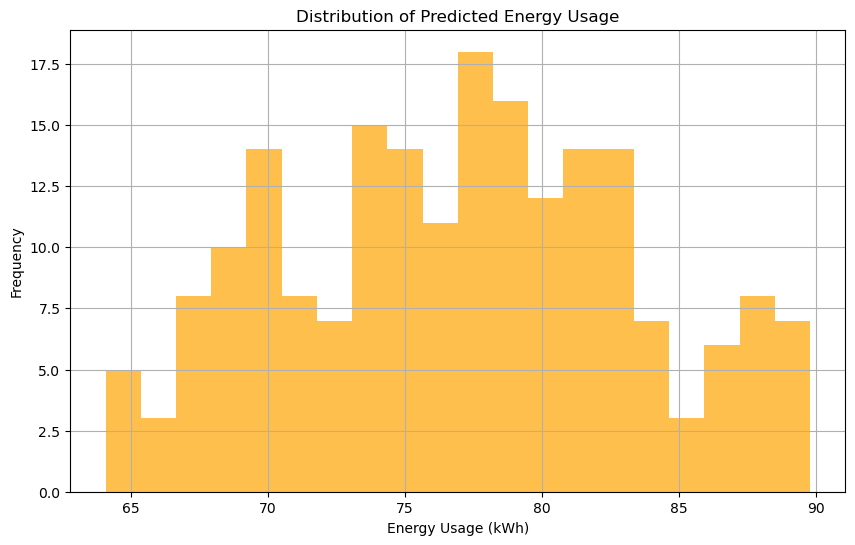

In [10]:
# Histogram of predicted energy usage
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Predicted Energy Usage')
plt.xlabel('Energy Usage (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
